# Machine Learning Engineer Nanodegree
## Capstone Project
## Predicting Graduate Admissions


----
## Exploring the Data
loading necessary Python libraries and loading the Admission_Predict data.

In [582]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
# Import supplementary visualization code visuals.py
import visuals as vs
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

# Load the Admission_Predict dataset
data = pd.read_csv("Admission_Predict.csv")

# Success - Display the first record
display(data.head(n=10))
print ("dataset has {} samples with {} features each.".format(*data.shape))

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


dataset has 500 samples with 9 features each.


In [583]:
# drop the first column the serial numbers which is useless in making prediction
data= data.drop('Serial_No',1)
data

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [584]:
n_records = data.describe()
n_records

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


from the avove table, we can see the average of chance of admission to the uni

In [585]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE_Score            500 non-null int64
TOEFL_Score          500 non-null int64
University_Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
ChanceOfAdmit        500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


^ from the above result, we noticed that there are no missing values in the dataset which is a plus point for us as we do not need to worry about dealing with missing values.

In [586]:
print('Mean CGPA Score is :',int(data['CGPA'].mean()))
print('Mean GRE Score is :',int(data['GRE_Score'].mean()))
print('Mean TOEFL Score is :',int(data['TOEFL_Score'].mean()))
print('Mean University rating is :',int(data['University_Rating'].mean()))
print('Mean University rating is :',int(data['University_Rating'].mean()))

Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean TOEFL Score is : 107
Mean University rating is : 3
Mean University rating is : 3


####  correlations between the features and the chance of admission to the university

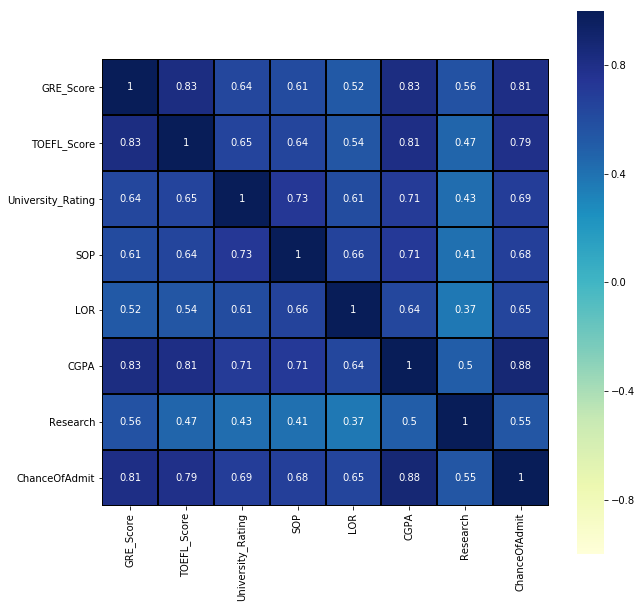

In [587]:
# Heat map gives a good pictorial representation of the correlation of features to our target value chance of admit to university.
fig=plt.gcf()
fig.set_size_inches(10,10)
fig=sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

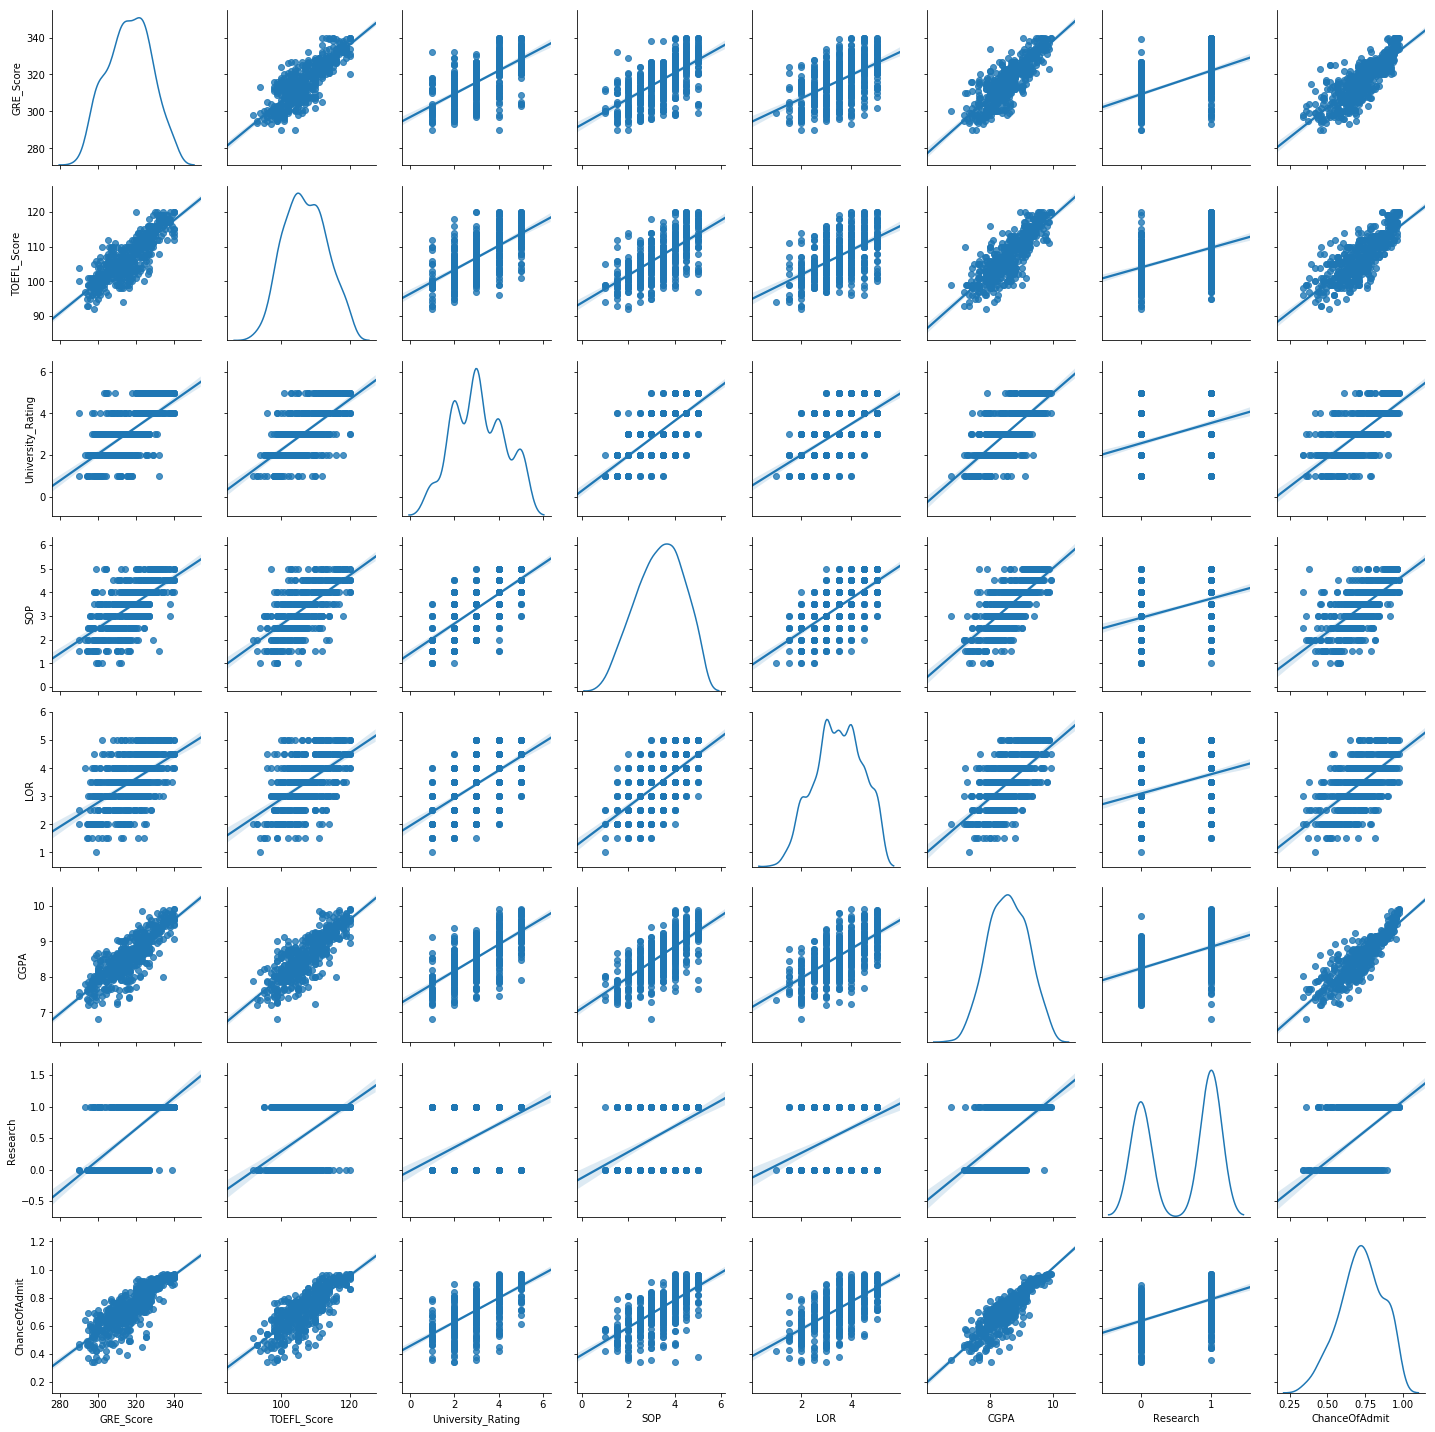

In [588]:
sns.pairplot(data,vars = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research','ChanceOfAdmit'],
             kind = 'reg',diag_kind = 'kde',palette="husl")

The most striking insight for me would be the fact that though research is not highly correlated with the chances of admission, having done research leads to better GRE and TOEFL score which have high correlation with the chances of admission.
I draw a graph that show the impact of research with getting high GRE score and TOFEL score

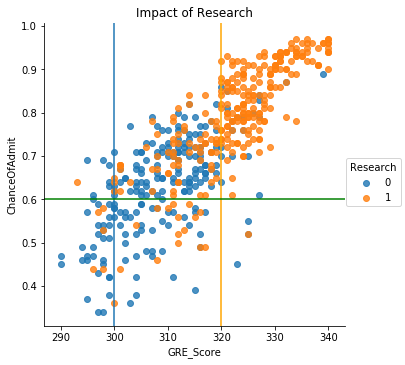

In [589]:
# add SNS plot here with hue = 'Research'
plt.rcParams['figure.figsize'] = 10,20
sns.lmplot(x = 'GRE_Score' , y = 'ChanceOfAdmit',hue = 'Research',data = data,fit_reg = False)
plt.axvline(x = 300,ymin = 0,ymax = 1)
plt.axvline(x = 320,ymin = 0,ymax = 1,color = 'orange')
plt.axhline(y = 0.6,color = 'green')
plt.title('Impact of Research')
plt.show()

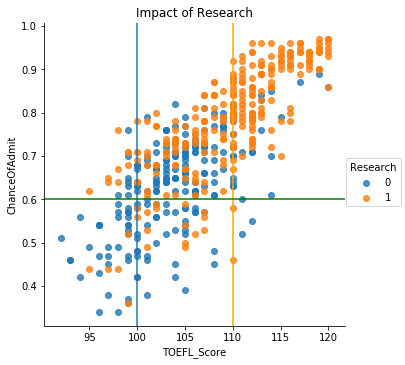

In [590]:
# add SNS plot here with hue = 'Research'
plt.rcParams['figure.figsize'] = 10,20
sns.lmplot(x = 'TOEFL_Score' , y = 'ChanceOfAdmit',hue = 'Research',data = data,fit_reg = False)
plt.axvline(x = 100,ymin = 0,ymax = 1)
plt.axvline(x = 110,ymin = 0,ymax = 1,color = 'orange')
plt.axhline(y = 0.6,color = 'green')
plt.title('Impact of Research')
plt.show()

In [591]:
# data = df.reindex(columns=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit'])
# data[data['Research']> 0 ].count()
data[data['ChanceOfAdmit'] >= 0.72].shape[0]

264

A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals having chance more than 72 % .

The total number of records, 'n_records'
The number of individuals having chance admit more than 72% , 'n_greater_72'.
The number of individuals not having chance admit , 'n_at_most_72'.
The percentage of individuals having chance admit more than 72% , 'greater_percent'.


In [615]:
#  Total number of records
n_records = data.shape[0]
# Number of candidates where have more than 72% acceptance chance in university 
n_greater_72 = data[data['ChanceOfAdmit'] >= 0.72].shape[0]

# Number of candidates where have Less than 72% acceptance chance in university 
n_at_most_72 = data[data['ChanceOfAdmit'] < 0.72].shape[0]

#  Percentage of individuals whose having chance admit more than 72% 
greater_percent = float(n_greater_72/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals having chance admit: {}".format(n_greater_72))
print("Individuals not having chance admit: {}".format(n_at_most_72))
print("Percentage of individuals having chanceof admission to the university more than 0.72: {}%".format(greater_percent))

Total number of records: 500
Individuals having chance admit: 264
Individuals not having chance admit: 236
Percentage of individuals having chanceof admission to the university more than 0.72: 52.800000000000004%


## Preparing and preprocessing the Data

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted.

#### shuffle and split data into features and target label 

In [616]:
# Split the data into features and target label
chanceAdmit_raw= data['ChanceOfAdmit']
feature_raw= data.drop('ChanceOfAdmit', axis = 1)


#### Normalizing Numerical Features
it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution, however, normalization ensures that each feature is treated equally when applying supervised learners.

In [617]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
d= data.drop('ChanceOfAdmit',1)
num_vars = list(set(d.columns) - set(data.select_dtypes("object").columns))
scaler = MinMaxScaler()
for i in num_vars:
    data[i] = scaler.fit_transform(data[[i]])
    print(i)

data

TOEFL_Score
University_Rating
GRE_Score
CGPA
Research
SOP
LOR


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.92
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.76
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.72
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.80
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.65
5,0.80,0.821429,1.00,0.875,0.500,0.814103,1.0,0.90
6,0.62,0.607143,0.50,0.500,0.750,0.448718,1.0,0.75
7,0.36,0.321429,0.25,0.500,0.750,0.352564,0.0,0.68
8,0.24,0.357143,0.00,0.250,0.125,0.384615,0.0,0.50
9,0.66,0.571429,0.50,0.625,0.500,0.576923,0.0,0.45


In [618]:
features_final = pd.get_dummies(feature_raw)

#  Encode the 'chanceAdmit_raw' data to numerical values
chanceAdmit = chanceAdmit_raw.apply(lambda l: 0 if l < 0.72 else 1)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
count=0
for i in chanceAdmit:
    if i ==1:
        count +=1
print("number of chance admission= {}" .format (count))

7 total features after one-hot encoding.
number of chance admission= 264


#### split the data into training and testing sets
Now all numerical features have been normalized. As always, I split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [619]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    chanceAdmit, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 400 samples.
Testing set has 100 samples.


## Evaluating Model Performance

#### Creating a Training and Predicting Pipeline 
 I create a training and predicting pipeline that allows to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. I also calculat the training and prediction time. also calculate the traing and testing accuracy, as well as the f-score of training and testing. 

In [620]:
#  Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: chance-of-Admission training set
       - X_test: features testing set
       - y_test: chance-of-Admission testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    #  then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] =  fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    #  Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test,  beta=0.3 )
       
    # Success
    print("{} trained on {} samples: \n testing time={}, testing accuracy= {}, and testing f-score={}.".format(learner.__class__.__name__, sample_size,  results['pred_time'] , results['acc_test'],  results['f_test']))
    print("\n training time={}, training accuracy= {}, and training f-score={}.".format( results['train_time'] , results['acc_train'],  results['f_train']))
    print('\n ----------------------------------------------')
    # Return the results
    return results

#### Initial Model Evaluation

In [631]:
# Import the three supervised learning models from sklearn
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn  import utils
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Initializing the three models 
clf_A = LogisticRegression(random_state=42)
clf_B = RandomForestClassifier(random_state=42)
clf_C = AdaBoostClassifier(random_state=42, base_estimator=LogisticRegression())

# Calculating the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1) 
samples_1 = int(samples_100* 0.01) 

# Collecting results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


LogisticRegression trained on 4 samples: 
 testing time=0.0040171146392822266, testing accuracy= 0.47, and testing f-score=0.491509162429243.

 training time=0.0, training accuracy= 0.5366666666666666, and training f-score=0.59147685525349.

 ----------------------------------------------
LogisticRegression trained on 40 samples: 
 testing time=0.0, testing accuracy= 0.87, and testing f-score=0.8441821869813757.

 training time=0.0019965171813964844, training accuracy= 0.8466666666666667, and training f-score=0.8342665173572229.

 ----------------------------------------------
LogisticRegression trained on 400 samples: 
 testing time=0.0, testing accuracy= 0.88, and testing f-score=0.872340425531915.

 training time=0.0, training accuracy= 0.8633333333333333, and training f-score=0.8764186633039092.

 ----------------------------------------------
RandomForestClassifier trained on 4 samples: 
 testing time=0.005151987075805664, testing accuracy= 0.82, and testing f-score=0.765474440633

## Final Model Evaluation


#### Choosing the Best Model



Based on the evaluation I performed earlier, and after evaluating these three models and comparing the f-score and accuracy on testing data (1%, 10%, 100%) of three models , I found that RandomForestClassifier was the best one becuase it has largest f-score and accuracy as will as smallest testing time. when sample data was 100%, the testing accuracy was 0.86 and testing f-score was 0.8634978671541744. It also took small time in testing mode (testing time=0.008084774017333984,). better than adaboost and logistic regression. So this classifier will be suitable for this dataset. 

#### Model Tuning

Use grid search (GridSearchCV) with at least one important parameter.

In [623]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Create the parameters list to tune, using a dictionary.
parameters = {"n_estimators":[500, 1000] }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5 )

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(model, parameters, scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (model.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8600
F-score on testing data: 0.8590

Optimized Model
------
Final accuracy score on the testing data: 0.8600
Final F-score on the testing data: 0.8676


#### Final Model Evaluation



|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8600         |   0.8600        |
| F-score        |    0.8590         |   0.8676        |


as we see, the accuracy of unoptimal and optimal modal is the same to each other but f-score is close to each other. the deffrintiation between unoptimal and optimal modal is 0.0086 for f-score, so the two models are good but the optimal model is better. 
___

## Feature Importance
we can determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label, which is most always a useful thing to do.



#### Extracting Feature Importance

In [606]:

def plot_imporatances(importances):
 
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='g', align='center')
    plt.yticks(range(len(indices)), [num_vars[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [603]:
def plot_imporatances(importances):
 
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='g', align='center')
    plt.yticks(range(len(indices)-1), [num_vars[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    indices

In [626]:

#  Train the supervised model on the training set using .fit(X_train, y_train)
lr_model = RandomForestClassifier().fit(X_train, y_train)
 
importances = lr_model.feature_importances_ 



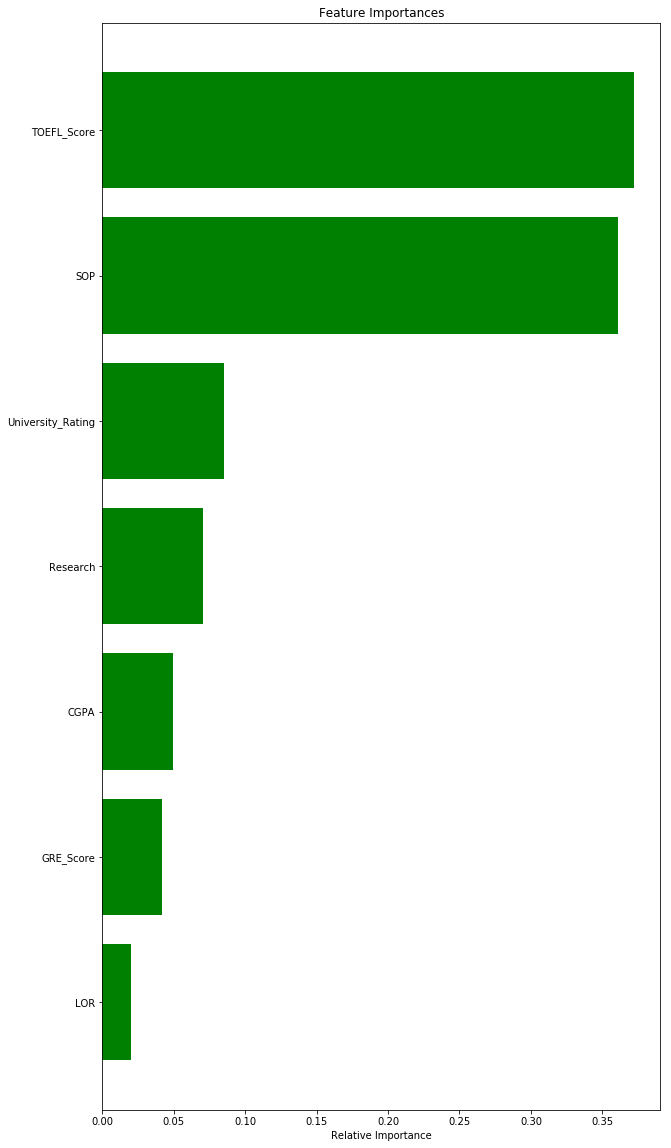

In [628]:
# Plot
plot_imporatances(importances)

## Conclusion

In [632]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8600
F-score on testing data: 0.8676

Final Model trained on reduced data
------
Accuracy on testing data: 0.8100
F-score on testing data: 0.8009


the Accuracy and f-score of the training and testing data reduced when we used reduced data (less feaures). whereas our dataset has a small feature, I think it's not important to reduce them more beacuase this method of reducing features affects the accureacy and f-score. However, if the training time is an important factor, I would use the reduced data (number of features) as training set.